## Build Linear Regression class ---> 'Batch Gradient Descent'

[*********************100%%**********************]  1 of 1 completed


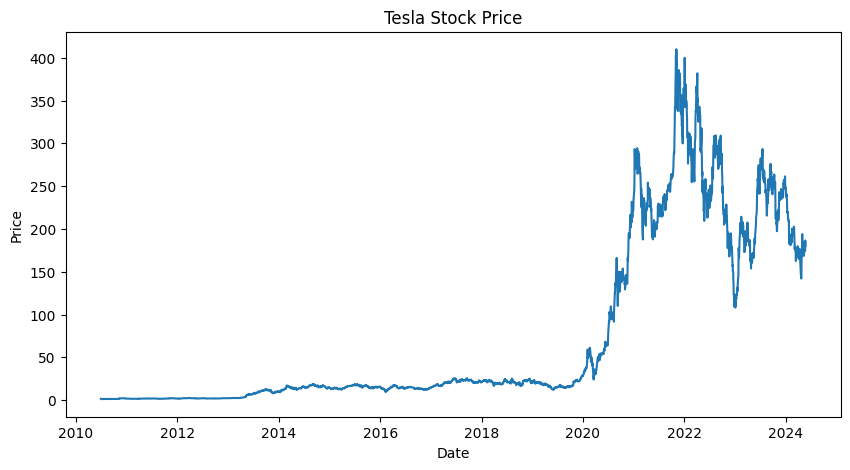

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ingore warnings
warnings.filterwarnings('ignore')

# Load the data
ticker = 'TSLA'
start = '2010-01-01'
end = datetime.now().date()
data = yf.download(tickers=ticker, start=start, end=end)

# Plotting the close price over time
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'])
plt.title("Tesla Stock Price")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [2]:
# Defining a function wrapper -> handle the input data
def valid_input(func):
    def wrapper(self, X, y=None, *args, **kwargs):
        X = np.asanyarray(X)
        if y is not None and X.shape[0] != y.shape[0]:
            raise ValueError("The inputs are not the same length")
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        if y is not None:
            y = np.asanyarray(y)
        if y is not None:
            return func(self, X, y, *args, **kwargs)
        return func(self, X, *args, **kwargs)
    return wrapper

# class -->
class LinearRegression:
    def __init__(self) -> None:
        self.theta = None

    @valid_input
    def batch_gradient_descent(self, X, y, *, learning_rate: float = 0.01, n_epochs: int = 1000,
                               tolerance: float = 1e-6) -> None:
        theta = np.random.randn(X.shape[1], 1)
        m = X.shape[0]

        for epoch in range(n_epochs):
            y_pred = X @ theta
            gradients = 2/m * X.T @ (y_pred - y)
            theta = theta - learning_rate * gradients
        
        self.theta = theta
        return self.theta
    
    @valid_input
    def predict(self, X):
        return X @ self.theta

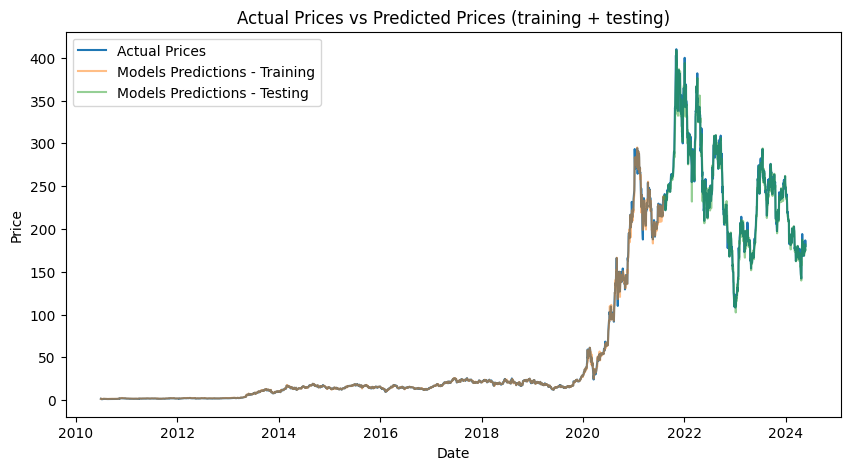

In [3]:
# Scale the input data and get our training and testing datasets
X = data[['Open']].values
y = data[['Close']].values

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, shuffle=False)

# Fit the data and make predictions 
lin_reg = LinearRegression()
lin_reg.batch_gradient_descent(X_train, y_train)

full_predictions = lin_reg.predict(scaled_X)

# Make preds on the full dataset
split_idx = len(X_train)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(data.index, y, label="Actual Prices", alpha=1)
plt.plot(data.index[:split_idx], full_predictions[:split_idx], label="Models Predictions - Training", alpha=0.5)
plt.plot(data.index[split_idx:], full_predictions[split_idx:], label="Models Predictions - Testing", alpha=0.5)
plt.title("Actual Prices vs Predicted Prices (training + testing)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [6]:
# Evaluate using PMs
preds = lin_reg.predict(X_test)
rmse = mean_squared_error(y_test, preds, squared=False)
mae = mean_absolute_error(y_test, preds)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Calculate the average difference between the actual and predicted values as a percentage
average_difference = np.mean(np.abs(preds - y_test) / y_test) * 100
print(f"Average difference between actual and predicted values: {average_difference:.2f}%")

RMSE: 8.02788563680454
MAE: 5.828555690779583
Average difference between actual and predicted values: 2.39%
